# Programmer: Giovanni Vecchione
## Date: 2/12/24

## Subject: Project 2
Fine-Tune and customize model from project 1.

# MODEL 2 ver. 14- Image Classifier Using the Sequential API (w/ Batch Normalization and Dropout Layers)

Data set: Keras database of fashion_mnist
Status: Done

### NOTE: 
This final model is named version 14 due to the test run number

In [30]:
#MODEL 2.1 has gone through changes, to see orginial refer back to project 1

import tensorflow as tf
import matplotlib as mpl

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

tf.random.set_seed(42)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00008, beta_1=0.9,
                                     beta_2=0.999)

#Model Struct.
model2_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(200, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),  
    tf.keras.layers.Dropout(rate=0.10),

    tf.keras.layers.Dense(200, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(rate=0.20),

    tf.keras.layers.Dense(150,kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(rate=0.30),  
    
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),  
    
    tf.keras.layers.Dense(10, activation="softmax")
])

#NOTE: There is debate on which order the layers should be in, however generally dropout is after the activation function
#Although based on some research a recommended way to do it is; Dense/Convolutional , Batch Norm, Activation Function, then dropout

model2_1.summary()

model2_1.compile(loss="sparse_categorical_crossentropy",
              optimizer= optimizer,
              metrics=["accuracy"])

#This portion stops training using early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history2_1 = model2_1.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 200)               157000    
                                                                 
 batch_normalization_48 (Ba  (None, 200)               800       
 tchNormalization)                                               
                                                                 
 re_lu_44 (ReLU)             (None, 200)               0         
                                                                 
 dropout_33 (Dropout)        (None, 200)               0         
                                                     

# Testing: 

## Original settings: 

dropout rates all .15 
activation all ReLU
neurons are 300 300 100 50 10

    Epoch 30/30
    1719/1719 [==============================] - 3s 2ms/step - loss: 0.2400 - accuracy: 0.9103 - val_loss: 0.2988 - val_accuracy: 0.8894

Test #1:
    lowered dropout rates to .1 and decreased the initial neurons from 300 to 250.

        Epoch 30/30
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.2170 - accuracy: 0.9205 - val_loss: 0.3016 - val_accuracy: 0.8894

Test #2:
    added an optimizer to adjust learning rate. Changed to .002
        Epoch 30/30
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.2205 - accuracy: 0.9186 - val_loss: 0.2976 - val_accuracy: 0.8912

Test #3: 
    Increasing learning rate from .002 to .005
    Activation all ReLU
    DropRate: all .1 
    Neurons: 250 300 100 50 10

        Epoch 30/30
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.2156 - accuracy: 0.9209 - val_loss: 0.2891 - val_accuracy: 0.8956

Test #4:
    Adding regularization layer to first dense layer (.001)
        PERFORMED POORLY

Test #5:
    Regularization layer to first dense layer set to .0001 holds some possible benefits, increased epochs to 50
        Caused overfitting, possible no need for it

Test #6:
    Scrapping the regularization layer. Using leaky ReLU to see if this improves results.
        Epoch 30/30
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.2396 - accuracy: 0.9107 - val_loss: 0.3006 - val_accuracy: 0.8920

Test #7:
    Moved dropout layer to third hidden layer
        Epoch 30/30
        1719/1719 [==============================] - 3s 2ms/step - loss: 0.2323 - accuracy: 0.9148 - val_loss: 0.3041 - val_accuracy: 0.8892

Test #8:
    Changed Optimizer to custom:
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Initial learning rate of 0.001

            Epoch 30/30
            1719/1719 [==============================] - 4s 2ms/step - loss: 0.1910 - accuracy: 0.9275 - val_loss: 0.3308 - val_accuracy: 0.8878

Test #9:
    Changed Optimizer:
        optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
        epochs 100

            Epoch 100/100
            1719/1719 [==============================] - 3s 2ms/step - loss: 0.1248 - accuracy: 0.9533 - val_loss: 0.4062 - val_accuracy: 0.8742

            At some point the val_loss and val_accuracy takes a hit.

Test #10:
    Increasing dropout rate and adding decay to optimizer. Also increase learning rate to .01.

        NOPE

Test #11: 
    Changed from SGD optimizer to Adam.
        Dropout rates: .1 and .2
        LR: .001
        Neurons: 250 300 100 50 10
        beta_1=0.9
        beta_2=0.999

        Epoch 30/30
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.2011 - accuracy: 0.9240 - val_loss: 0.3245 - val_accuracy: 0.8856

    Results however show spikes with val_loss, consider using regularization or adjust dropouts

Test #12: 
    Same as test 11 except swapped to ReLU for activation, not enjoying results
        Smoothed out the curve! Thats good, next lets go ahead and find other additions.
        
        Epoch 30/30
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.1582 - accuracy: 0.9395 - val_loss: 0.3270 - val_accuracy: 0.8916

Test #13:
    Changing neurons

        Performed extremely well with the change in neurons for the training, however val_loss and accuracy stagnated. Overfitting it seems.
        May need to add some regularization layers after all.

        Epoch 30/30
        1719/1719 [==============================] - 5s 3ms/step - loss: 0.1534 - accuracy: 0.9425 - val_loss: 0.3162 - val_accuracy: 0.8988

#### Test #14: (BEST SO FAR)
    Adjusting Learning rate to an even lower point (.0008)
    Reducing neurons to 200 200 150 100 10
    Added dropout layer: .1 .2 .3
    Adding early stopping layer: Stops if the validation loss does not improve for 5 consecutive epochs

        Epoch 24/30
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.2088 - accuracy: 0.9233 - val_loss: 0.2924 - val_accuracy: 0.8988

        Good! it has improved but lets try testing the optimizer next.

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008, beta_1=0.9,
                                        beta_2=0.999)

Test #15:
    Changing optimizer from Adam back to SGD but with momentum.
        
        Epoch 30/30
        1719/1719 [==============================] - 3s 2ms/step - loss: 0.2907 - accuracy: 0.8947 - val_loss: 0.3091 - val_accuracy: 0.8864

    Did not perform as well as adam, change LR from .001 to .01

Test #16:
    Went back to adam optimizer, showed better results. 
    Changed neurons to 300 250 150 100 10
        
        Epoch 13/40
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9079 - val_loss: 0.3005 - val_accuracy: 0.8908


Final Observations:
Its possible that the simplicity of the model could be hindering the validation results. My model is simple yet the overall structure does well. More complex model may be needed to reach that .99 accuracy. 

Otherwise rebuild a new model.

# Model 2 ver. 14: (BEST SO FAR) Fine tuned Testing
    Adjusting Learning rate to an even lower point (.0008)
    Reducing neurons to 200 200 150 100 10
    Added dropout layer: .1 .2 .3
    Adding early stopping layer: Stops if the validation loss does not improve for 5 consecutive epochs

        Epoch 24/30
        1719/1719 [==============================] - 4s 2ms/step - loss: 0.2088 - accuracy: 0.9233 - val_loss: 0.2924 - val_accuracy: 0.8988

        Good! it has improved but lets try testing the optimizer next.

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008, beta_1=0.9,
                                        beta_2=0.999)

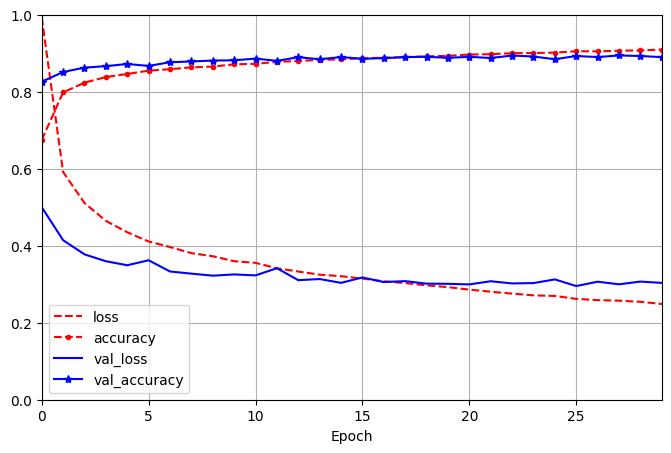

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history2_1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

# THINGS TO LOOK OUT FOR:

### Overfitting - Regularization techniques (L1/L2 regularization, dropout), early stopping, and data augmentation can help combat overfitting.
    Classic Signs-
        Increasingly better training loss but worsening validation loss.
        Training accuracy might continually rise while validation accuracy plateaus or decreases.
    
    The Gap -
         A large and widening gap between the training and validation curves often indicates overfitting.

### Underfitting -  Consider using a more complex model architecture, increase training epochs, or explore feature engineering to provide more informative data to your model.
    Poor Performance on Both -
        If both training and validation loss are high, and accuracy for both is low, your model might be underfitting.

## Healthy Learning :

 Convergence - It's normal for validation loss to be slightly higher than training loss. The model naturally performs a bit better on data it's been repeatedly exposed to.

 Slightly Higher Validation Loss - Sharp spikes or drops in validation loss/accuracy could point to issues like a learning rate that's too high or instability in your data.

## Optimizers:

    There are several kinds for different situations,
        SGD
        SGD w/ momentum
        SGD w/ Momentum & nesterov
        Adagrad
        RMSprop
        Adam
        AdaMax
        Nadam
        AdamW
        etc.

## Learning Rate Scheduling:
    Power scheduling
    Exponential scheduling
    Piecewise constant scheduling
    Performance scheduling
    1cycle scheduling


## IF YOU USE ONE HOT ENCODING ENSURE MATRIXES MATCH AND COMES BEFORE THE MODEL.


In [32]:
# Evaluate the model on the validation set
val_loss, val_acc = model2_1.evaluate(X_valid, y_valid)
print("Validation loss: {:.3f}, Validation accuracy: {:.3f}".format(val_loss, val_acc))

157/157 [==============================] - 0s 873us/step - loss: 0.3051 - accuracy: 0.8926
Validation loss: 0.305, Validation accuracy: 0.893
